In [23]:
#lectura de librerias y lectura del data frame.
import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df_games = pd.read_csv('../V_GAMES.csv')


In [25]:
df_games.info()
df_games


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [26]:
#remplazo de nombre de columnas metodo .lower()
df_games.columns = df_games.columns.str.lower()
df_games.info()
print("_________user_score")
print(df_games['user_score'].sample(15))
print("_________critic_score")
print(df_games['critic_score'].sample(15))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
_________user_score
14706    NaN
6579     8.5
13533    8.1
3534     6.3
454      NaN
13311    tbd
12505    NaN
8008       7
13387    NaN
10957    NaN
13526    tbd
10636    NaN
4625     8.5
16139    NaN
10364    NaN
Name: user_score, dtype: o

In [27]:

#cambie a year of release a time pd por que es mas facil tratar datos en cuestion de fecha con este formato.
#y igula le quite el punto decimal para una mejor lectura.
df_games = df_games.dropna(subset=["year_of_release"]).reset_index(drop=True)
df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors='coerce').astype('Int64')
df_games['year_of_release'] = pd.to_datetime(df_games['year_of_release'], format='%Y', errors='coerce')
df_games['year_of_release'] = pd.to_datetime(df_games['year_of_release'], errors='coerce')
df_games['year_of_release'] = df_games['year_of_release'].dt.year


In [28]:
#aqui cambie los valores ausentes de user score "TBA" por NAN para deshacerme del TBA
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
#critic score cambie sus valores ausentes con la media ya que no hay muchos valores atipicos y se recomienda llenar con este valor.
df_games['critic_score'].fillna(df_games['critic_score'].mean(), inplace=True)
#user_score lo mismo igual use la media para rellenar ausentes debido al caso.
df_games['user_score'].fillna(df_games['user_score'].mean(), inplace=True)
#rating puse la moda ya que es un valor categirico y se recomenda usar la moda para este tipo de caso.
df_games['rating'].fillna(df_games['rating'].mode()[0], inplace=True)



/var/folders/8v/tfl0m4vx2wd80yhpb6b7x1rm0000gn/T/ipykernel_29381/837206425.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['critic_score'].fillna(df_games['critic_score'].mean(), inplace=True)
/var/folders/8v/tfl0m4vx2wd80yhpb6b7x1rm0000gn/T/ipykernel_29381/837206425.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [29]:
print(df_games['user_score'].sample(10))
df_games.info()

8761     7.12633
11099    6.30000
12530    4.10000
12099    7.12633
9760     8.20000
546      7.12633
14996    7.80000
2787     7.12633
7931     5.40000
6651     7.30000
Name: user_score, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [30]:

#creo la columna total_sales y sumo todas las zonas para crear la nueva columna.
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
print(df_games['total_sales'].head(5))


col = df_games.pop('total_sales')


#la pongo al lado de other_sales para una mejor lectura.
xd_index = df_games.columns.get_loc('other_sales') + 1
df_games.insert(xd_index, 'total_sales', col)



df_games.head(10)

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.000000,8.00000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,68.994363,7.12633,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.000000,8.30000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.000000,8.00000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,68.994363,7.12633,E
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,68.994363,7.12633,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.000000,8.50000,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.000000,6.60000,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,87.000000,8.40000,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31,68.994363,7.12633,E


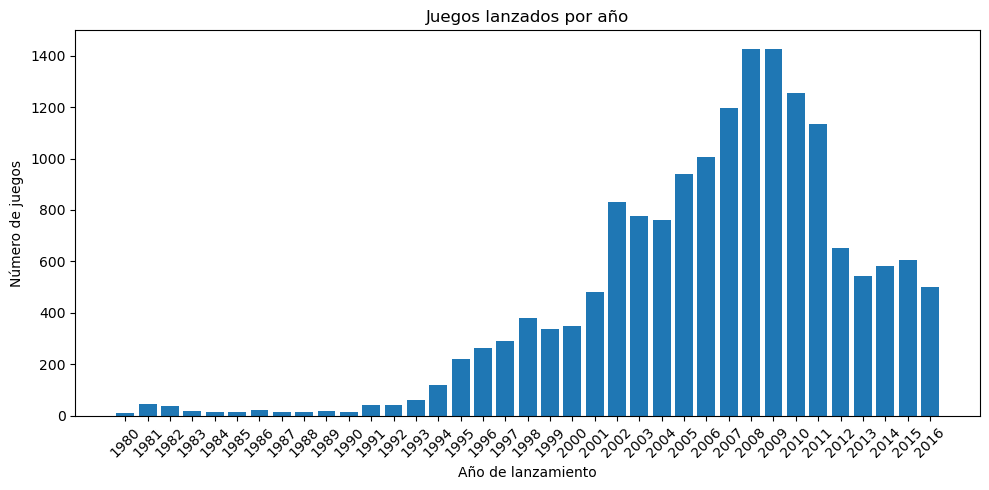

In [31]:
#Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
# si son sigmificativos vemos un crecimento a lo largo de los años con un pico en 2007 - 2008.




games_per_year = df_games['year_of_release'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.bar(games_per_year.index.astype(str), games_per_year.values)
plt.xlabel("Año de lanzamiento")
plt.ylabel("Número de juegos")
plt.title("Juegos lanzados por año")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
df_games = df_games.dropna(subset=['year_of_release'])
df_games['year_of_release'] = df_games['year_of_release'].astype(int)

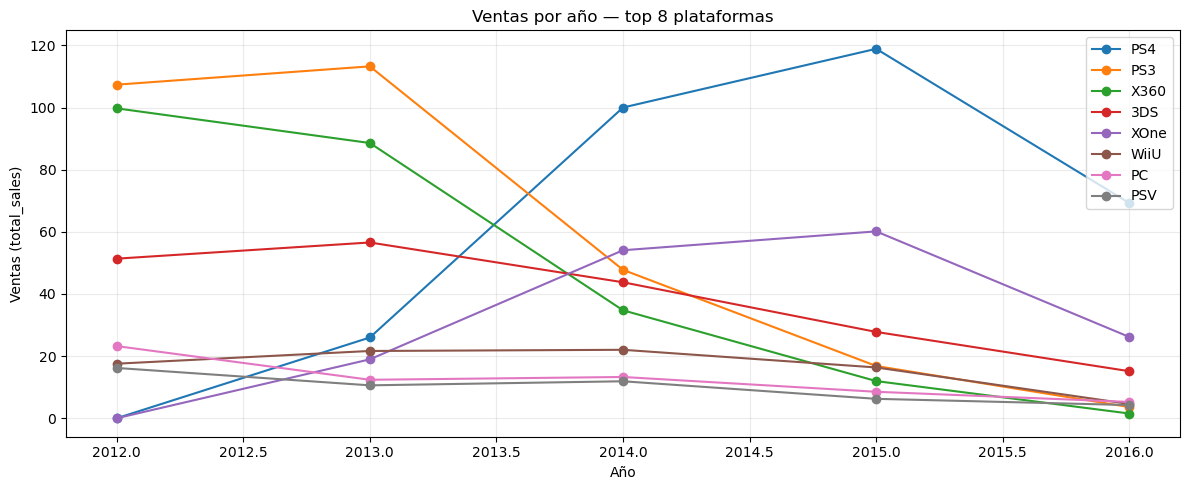

<Figure size 1200x500 with 0 Axes>

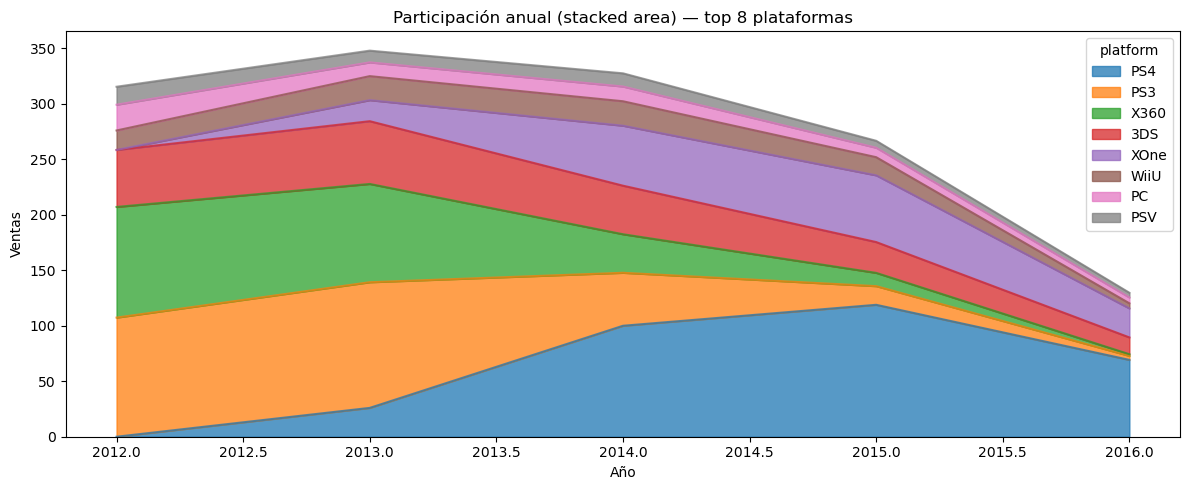

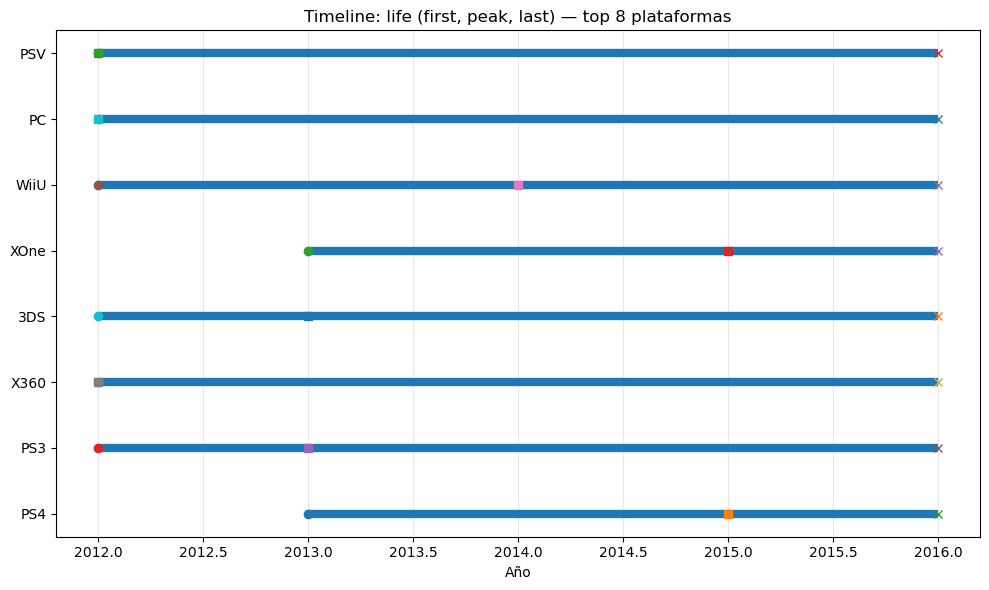

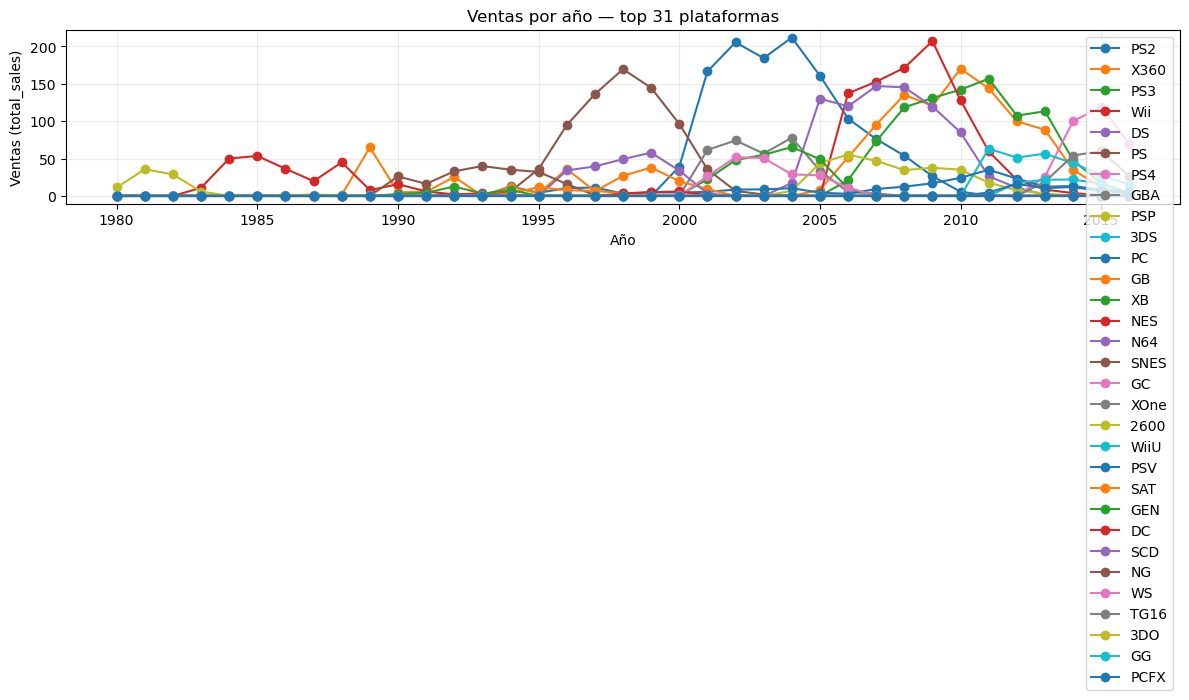

<Figure size 1200x500 with 0 Axes>

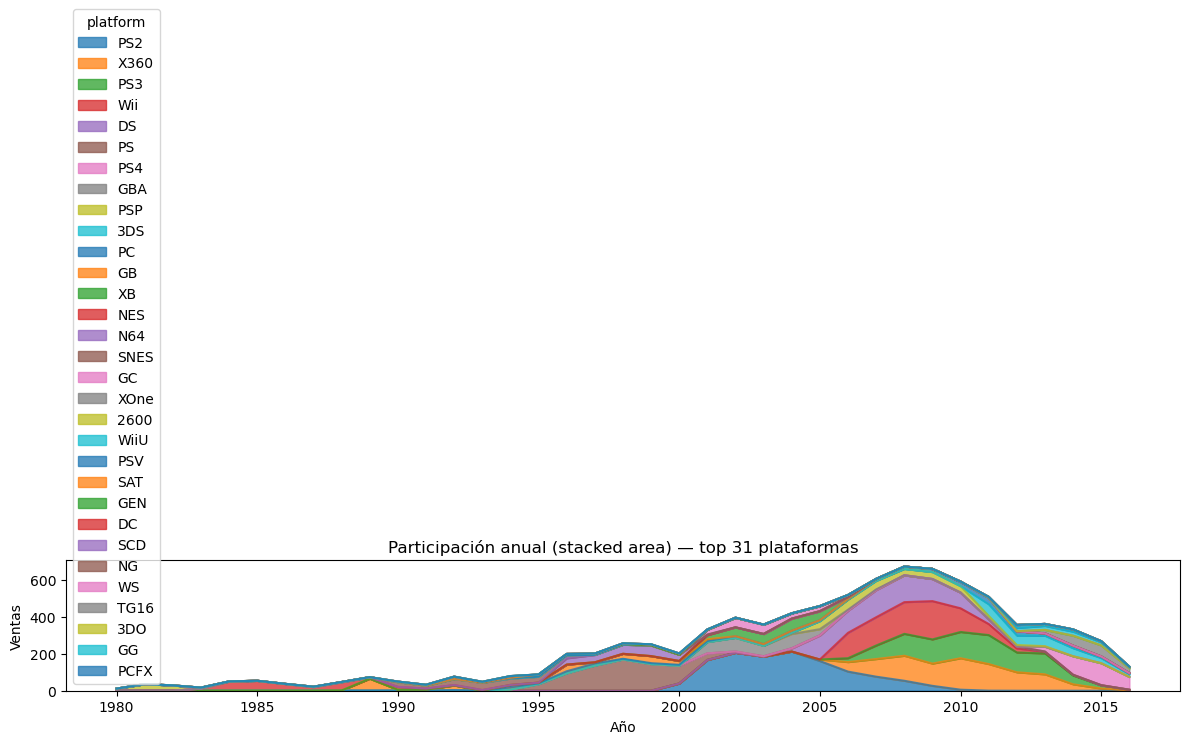

/var/folders/8v/tfl0m4vx2wd80yhpb6b7x1rm0000gn/T/ipykernel_29381/1557379874.py:93: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  decline_candidates = pd.concat([decline_candidates, new_row], ignore_index=True)


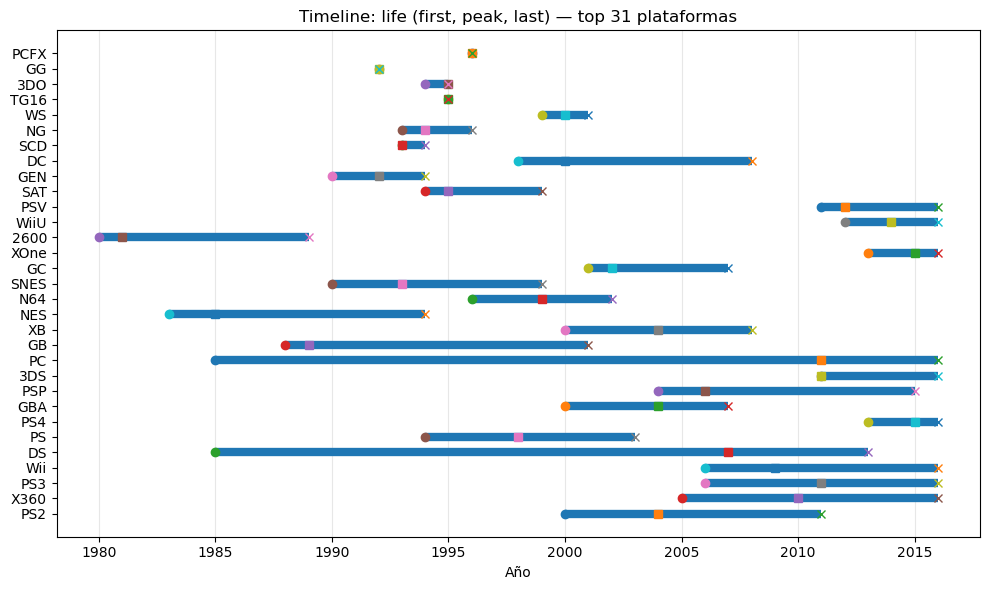


Top plataformas por ventas totales:
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
Name: total_sales, dtype: float64

Plataformas candidatas en declive (fueron populares pero ahora con ventas muy bajas):


,platform,past_avg_share,recent_sales,peak_sales
0,PS2,0.166229,0.00,211.81
1,Wii,0.136904,5.07,206.97
2,DS,0.129873,0.00,146.94
3,PSP,0.048242,0.36,55.32
4,XB,0.039815,0.00,65.42



Resumen de vida (primeras 20 por ventas):


,platform,first_year,peak_year,last_year,years_active,years_to_peak,years_from_peak_to_last,total_sales
0,PS2,2000,2004,2011,12,4,7,1233.56
1,X360,2005,2010,2016,12,5,6,961.24
2,PS3,2006,2011,2016,11,5,5,931.34
3,Wii,2006,2009,2016,11,3,7,891.18
4,DS,1985,2007,2013,29,22,6,802.78
5,PS,1994,1998,2003,10,4,5,727.58
6,PS4,2013,2015,2016,4,2,1,314.14
7,GBA,2000,2004,2007,8,4,3,312.88
8,PSP,2004,2006,2015,12,2,9,289.53
9,3DS,2011,2011,2016,6,0,5,257.81



Estadísticas resumen (medianas/medias):
{'time_to_peak_median': 2.0, 'time_to_peak_mean': np.float64(3.3870967741935485), 'lifespan_median': 7.0, 'lifespan_mean': np.float64(8.612903225806452), 'decline_median': 4.0, 'decline_mean': np.float64(4.225806451612903)}


In [33]:

#observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
# el rango de vida de una empresa es de 8 años en aparecer y desaparecer 4 de subida 4 de bajada.
def platform_lifecycle_analysis(df_games,
                                sales_cols = ['na_sales','eu_sales','jp_sales','other_sales'],
                                year_col = 'year_of_release',
                                platform_col = 'platform',
                                top_k = 6,
                                recent_window = 3,
                                popular_past_window = 10,
                                popular_top_pct = 0.2,
                                decline_sales_abs_thresh = 0.01):

    df = df_games.copy()

    
    if not np.issubdtype(df[year_col].dtype, np.integer):
        df[year_col] = pd.to_numeric(df[year_col], errors='coerce')
    df = df.dropna(subset=[year_col]).copy()
    df[year_col] = df[year_col].astype(int)

    
    for c in sales_cols:
        if c not in df.columns:
            raise ValueError(f"Falta columna de ventas: {c}")
    df[sales_cols] = df[sales_cols].fillna(0)

    
    if 'total_sales' not in df.columns:
        df['total_sales'] = df[sales_cols].sum(axis=1)

   
    platform_total = df.groupby(platform_col)['total_sales'].sum().sort_values(ascending=False)

   
    pivot = df.pivot_table(index=year_col, columns=platform_col, values='total_sales', aggfunc='sum', fill_value=0)
    pivot = pivot.sort_index()

    
    top_platforms = platform_total.head(top_k).index.tolist()

    plt.figure(figsize=(12,5))
    for p in top_platforms:
        if p in pivot.columns:
            plt.plot(pivot.index, pivot[p], marker='o', label=p)
    plt.title(f'Ventas por año — top {top_k} plataformas')
    plt.xlabel('Año')
    plt.ylabel('Ventas (total_sales)')
    plt.legend()
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12,5))
    pivot[top_platforms].fillna(0).plot.area(alpha=0.75, figsize=(12,5))
    plt.title(f'Participación anual (stacked area) — top {top_k} plataformas')
    plt.ylabel('Ventas')
    plt.xlabel('Año')
    plt.tight_layout()
    plt.show()

    last_year = pivot.index.max()
    recent_years = [y for y in range(last_year - recent_window + 1, last_year + 1)]
    start_past = max(pivot.index.min(), last_year - popular_past_window - recent_window)
    past_window = pivot.loc[start_past: last_year - recent_window] if start_past <= last_year - recent_window else pd.DataFrame()

    decline_candidates = pd.DataFrame(columns=['platform','past_avg_share','recent_sales','peak_sales'])

    if not past_window.empty:
        total_past = past_window.sum(axis=1)
        share_past = (past_window.div(total_past, axis=0)).mean().sort_values(ascending=False)
        cutoff_popular = share_past.quantile(1 - popular_top_pct)  # top X% threshold
        popular_platforms = share_past[share_past >= cutoff_popular].index.tolist()

        if set(recent_years).issubset(set(pivot.index)):
            recent_sales = pivot.loc[recent_years].sum()
        else:
            recent_sales = pivot.loc[pivot.index >= (last_year - recent_window + 1)].sum()

        for p in popular_platforms:
            rec = float(recent_sales.get(p,0.0))
            peak = float(pivot[p].max()) if p in pivot.columns else 0.0
            past_share = float(share_past.get(p,0.0))
            # condiciones de declive: ventas recientes muy bajas absolutas o respecto al pico
            if (rec < decline_sales_abs_thresh) or (peak>0 and rec/peak < 0.1):
                new_row = pd.DataFrame([{
                'platform': p,
                'past_avg_share': past_share,
                'recent_sales': rec,
                'peak_sales': peak
                }])

# Concatenar con el DataFrame existente
                decline_candidates = pd.concat([decline_candidates, new_row], ignore_index=True)

    decline_candidates = decline_candidates.sort_values('past_avg_share', ascending=False)

    platform_stats = []
    for p in pivot.columns:
        s = pivot[p]
        nz = s[s>0]
        if nz.empty:
            continue
        first = int(nz.index.min())
        last = int(nz.index.max())
        peak_year = int(s.idxmax())
        years_active = last - first + 1
        years_to_peak = peak_year - first
        years_from_peak_to_last = last - peak_year
        total_sales_p = float(s.sum())
        platform_stats.append({
            'platform': p,
            'first_year': first,
            'peak_year': peak_year,
            'last_year': last,
            'years_active': years_active,
            'years_to_peak': years_to_peak,
            'years_from_peak_to_last': years_from_peak_to_last,
            'total_sales': total_sales_p
        })
    platform_stats_df = pd.DataFrame(platform_stats).sort_values('total_sales', ascending=False).reset_index(drop=True)

    if not platform_stats_df.empty:
        time_to_peak_med = platform_stats_df['years_to_peak'].median()
        time_to_peak_mean = platform_stats_df['years_to_peak'].mean()
        lifespan_med = platform_stats_df['years_active'].median()
        lifespan_mean = platform_stats_df['years_active'].mean()
        decline_med = platform_stats_df['years_from_peak_to_last'].median()
        decline_mean = platform_stats_df['years_from_peak_to_last'].mean()
    else:
        time_to_peak_med = time_to_peak_mean = lifespan_med = lifespan_mean = decline_med = decline_mean = np.nan

    topN = platform_stats_df.head(top_k)['platform'].tolist()
    if topN:
        plt.figure(figsize=(10,6))
        for i,p in enumerate(topN):
            row = platform_stats_df[platform_stats_df['platform']==p].iloc[0]
            plt.hlines(y=i, xmin=row['first_year'], xmax=row['last_year'], linewidth=6)
            plt.plot(row['first_year'], i, 'o', label='first' if i==0 else "", markersize=6)
            plt.plot(row['peak_year'], i, 's', markersize=6)
            plt.plot(row['last_year'], i, 'x', markersize=6)
        plt.yticks(range(len(topN)), topN)
        plt.xlabel('Año')
        plt.title(f'Timeline: life (first, peak, last) — top {top_k} plataformas')
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()

    summary_stats = {
        'time_to_peak_median': time_to_peak_med,
        'time_to_peak_mean': time_to_peak_mean,
        'lifespan_median': lifespan_med,
        'lifespan_mean': lifespan_mean,
        'decline_median': decline_med,
        'decline_mean': decline_mean
    }

    results = {
        'platform_total': platform_total,
        'pivot': pivot,
        'top_platforms': top_platforms,
        'decline_candidates': decline_candidates,
        'platform_stats_df': platform_stats_df,
        'summary_stats': summary_stats
    }

    return results


df_filtered = df_games[df_games['year_of_release'] >= 2012].copy()

results = platform_lifecycle_analysis(df_filtered, top_k=8, recent_window=3, popular_past_window=10)

results = platform_lifecycle_analysis(df_games, top_k=31, recent_window=3, popular_past_window=10)

print("\nTop plataformas por ventas totales:")
print(results['platform_total'].head(12))

print("\nPlataformas candidatas en declive (fueron populares pero ahora con ventas muy bajas):")
display(results['decline_candidates'])

print("\nResumen de vida (primeras 20 por ventas):")
display(results['platform_stats_df'].head(20))

print("\nEstadísticas resumen (medianas/medias):")
print(results['summary_stats'])

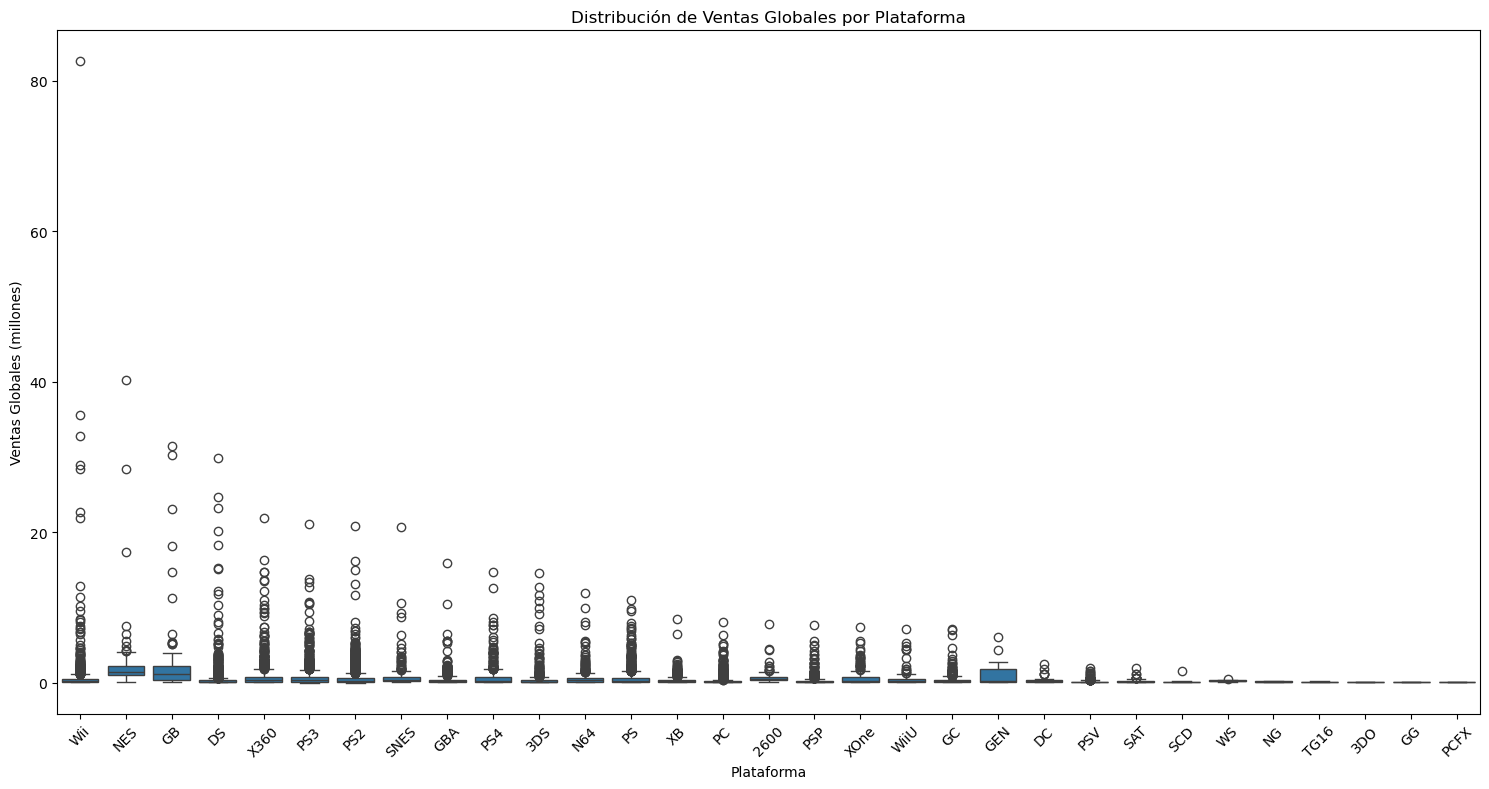

In [34]:
df_games.head(10)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_games, x='platform', y='total_sales')
plt.xticks(rotation=45)
plt.title('Distribución de Ventas Globales por Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xlabel('Plataforma')
plt.tight_layout()
plt.show()

In [35]:
platform_stats = df_games.groupby('platform')['total_sales'].agg([
    'mean', 'median', 'count',
]).round(2).sort_values('median', ascending=False)
print(platform_stats.head(33))

          mean  median  count
platform                     
NES       2.56    1.38     98
GB        2.62    1.18     97
2600      0.75    0.48    116
SNES      0.84    0.32    239
X360      0.78    0.28   1232
PS3       0.71    0.28   1306
N64       0.69    0.27    316
PS        0.61    0.26   1190
PS2       0.58    0.23   2127
XOne      0.65    0.22    247
WiiU      0.56    0.22    147
WS        0.24    0.22      6
PS4       0.80    0.20    392
Wii       0.69    0.19   1286
GBA       0.39    0.16    811
XB        0.31    0.15    803
GEN       1.06    0.15     29
GC        0.36    0.15    542
DC        0.31    0.14     52
SAT       0.19    0.12    173
3DS       0.50    0.12    512
DS        0.38    0.11   2121
NG        0.12    0.10     12
PSP       0.24    0.09   1193
TG16      0.08    0.08      2
SCD       0.31    0.06      6
PSV       0.13    0.05    429
PC        0.27    0.05    957
GG        0.04    0.04      1
PCFX      0.03    0.03      1
3DO       0.03    0.02      3


In [36]:
platform_analysis = df_games.groupby('platform').agg({
    'total_sales': ['count', 'mean', 'median', 'max']
}).round(2)

print("Por cantidad de juegos:")
print(platform_analysis.sort_values(('total_sales', 'mean'), ascending=False).head(31))

Por cantidad de juegos:
         total_sales                    
               count  mean median    max
platform                                
GB                97  2.62   1.18  31.38
NES               98  2.56   1.38  40.24
GEN               29  1.06   0.15   6.02
SNES             239  0.84   0.32  20.62
PS4              392  0.80   0.20  14.63
X360            1232  0.78   0.28  21.82
2600             116  0.75   0.48   7.81
PS3             1306  0.71   0.28  21.05
N64              316  0.69   0.27  11.90
Wii             1286  0.69   0.19  82.54
XOne             247  0.65   0.22   7.39
PS              1190  0.61   0.26  10.95
PS2             2127  0.58   0.23  20.81
WiiU             147  0.56   0.22   7.09
3DS              512  0.50   0.12  14.60
GBA              811  0.39   0.16  15.84
DS              2121  0.38   0.11  29.80
GC               542  0.36   0.15   7.06
XB               803  0.31   0.15   8.48
DC                52  0.31   0.14   2.41
SCD                6  0.31   0.06

In [37]:

#aqui como voy a trabajar en cuestion de calificasion de juegos para tener un enfoque mas realista,
#decidi crear otro dataframe y eliminar todos los valores ausentes de todas las filas y lasfilas igual del tba de las calificaciones. 
# eleji DS, PC ,X360 Y PS2 ya que son mercados que ya se desaroolaron no elegi la nueva generacion por que apenas estan empesando.

df_clean = pd.read_csv('../V_GAMES.csv')


df_clean.columns = df_clean.columns.str.lower()

df_clean['user_score'] = pd.to_numeric(df_clean['user_score'], errors='coerce')

df_clean = df_clean.dropna(subset=["year_of_release"]).reset_index(drop=True)
df_clean['year_of_release'] = pd.to_numeric(df_clean['year_of_release'], errors='coerce').astype('Int64')

df_clean['total_sales'] = df_clean[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

df_clean = df_clean.dropna(subset=['critic_score', 'user_score']).reset_index(drop=True)

print(f"Dataset original: {len(df_games)} juegos")
print(f"Dataset limpio (solo con reseñas): {len(df_clean)} juegos")
print(f"Juegos eliminados: {len(df_games) - len(df_clean)}")


platforms_to_analyze = ['DS', 'PC', 'X360', 'PS2']
df_selected = df_clean[df_clean['platform'].isin(platforms_to_analyze)].copy()

print(df_selected['platform'].value_counts())

Dataset original: 16446 juegos
Dataset limpio (solo con reseñas): 6894 juegos
Juegos eliminados: 9552
platform
PS2     1140
X360     861
PC       688
DS       465
Name: count, dtype: int64


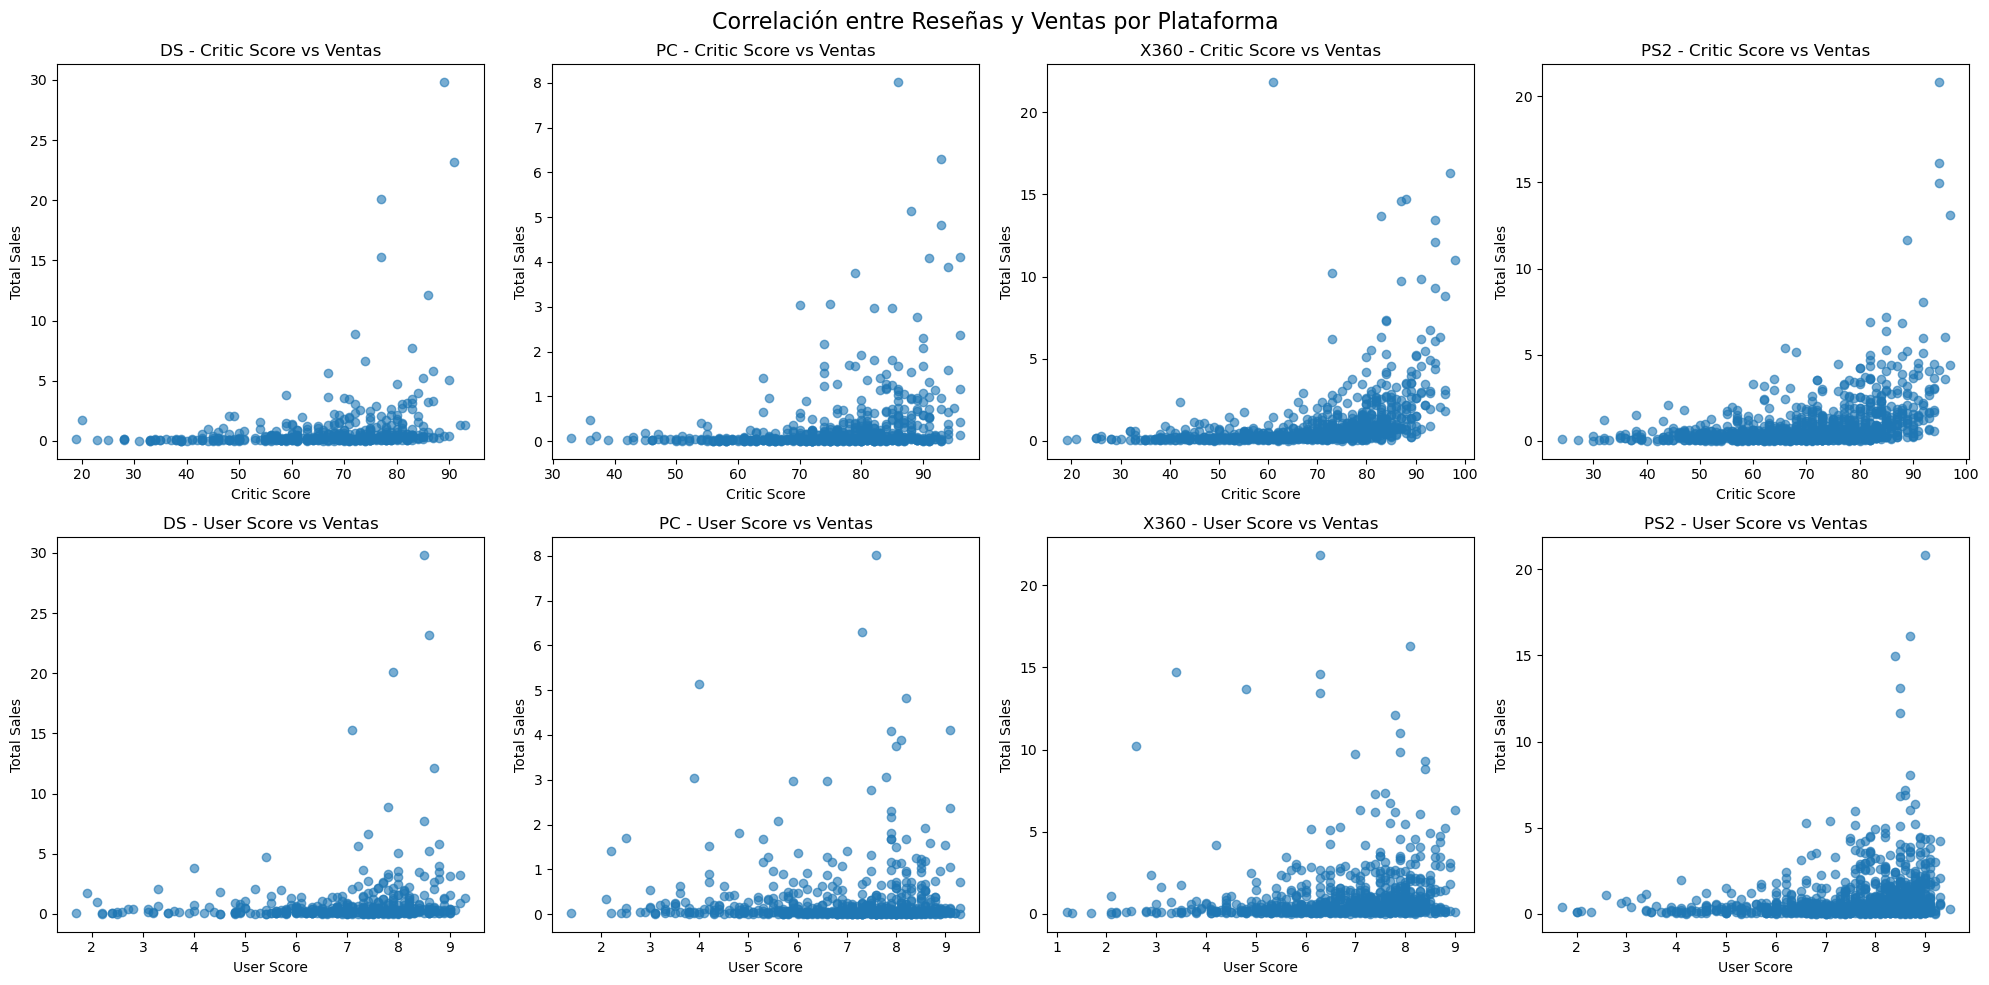

In [38]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Correlación entre Reseñas y Ventas por Plataforma', fontsize=16)

platforms = ['DS', 'PC', 'X360', 'PS2']

for i, platform in enumerate(platforms):
    data = df_selected[df_selected['platform'] == platform]
    
    
    axes[0, i].scatter(data['critic_score'], data['total_sales'], alpha=0.6)
    axes[0, i].set_title(f'{platform} - Critic Score vs Ventas')
    axes[0, i].set_xlabel('Critic Score')
    axes[0, i].set_ylabel('Total Sales')
      
    axes[1, i].scatter(data['user_score'], data['total_sales'], alpha=0.6)
    axes[1, i].set_title(f'{platform} - User Score vs Ventas')
    axes[1, i].set_xlabel('User Score')
    axes[1, i].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

In [39]:
correlations = {}

for platform in platforms_to_analyze:
    data = df_selected[df_selected['platform'] == platform]
    
    critic_corr = data['critic_score'].corr(data['total_sales'])
    user_corr = data['user_score'].corr(data['total_sales'])
    
    correlations[platform] = {
        'critic_correlation': critic_corr,
        'user_correlation': user_corr,
        'sample_size': len(data)
    }


for platform, corr in correlations.items():
    print(f"\n{platform}:")
    print(f"  Correlación Critic Score: {corr['critic_correlation']:.3f}")
    print(f"  Correlación User Score: {corr['user_correlation']:.3f}")
    print(f"  Tamaño muestra: {corr['sample_size']} juegos")


DS:
  Correlación Critic Score: 0.232
  Correlación User Score: 0.140
  Tamaño muestra: 465 juegos

PC:
  Correlación Critic Score: 0.257
  Correlación User Score: 0.004
  Tamaño muestra: 688 juegos

X360:
  Correlación Critic Score: 0.389
  Correlación User Score: 0.110
  Tamaño muestra: 861 juegos

PS2:
  Correlación Critic Score: 0.386
  Correlación User Score: 0.172
  Tamaño muestra: 1140 juegos


In [40]:
print("Estadísticas Critic Score:")
print(df_clean['critic_score'].describe())
print("\nEstadísticas User Score:")
print(df_clean['user_score'].describe())

Estadísticas Critic Score:
count    6894.000000
mean       70.258486
std        13.861082
min        13.000000
25%        62.000000
50%        72.000000
75%        80.000000
max        98.000000
Name: critic_score, dtype: float64

Estadísticas User Score:
count    6894.000000
mean        7.184378
std         1.439806
min         0.500000
25%         6.500000
50%         7.500000
75%         8.200000
max         9.600000
Name: user_score, dtype: float64


In [41]:
df_games_clean = df_games.dropna(subset=['name']).copy()


In [42]:
def find_multiplatform_games(df, min_platforms=2):
    """
    Encuentra juegos que están disponibles en múltiples plataformas
    """

    game_platform_count = df.groupby('name')['platform'].nunique()
    multiplatform_games = game_platform_count[game_platform_count >= min_platforms].index
    
    return df[df['name'].isin(multiplatform_games)]

#find_multiplatform_games(df_games, min_platforms=2)

xd2 = find_multiplatform_games(df_games, min_platforms=2)



xd_v = df_games_clean[df_games_clean['name'].str.contains('Tetris', case=False, na=False)]
print("JUEGO en todas las plataformas:")
print(xd_v[['name', 'platform', 'year_of_release', 'total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'critic_score', 'user_score']].sort_values('total_sales', ascending=False))

JUEGO en todas las plataformas:
                                            name platform  year_of_release  \
5                                         Tetris       GB             1989   
157                                       Tetris      NES             1988   
648                                  Tetris Plus       PS             1996   
778                                    Tetris DS       DS             2006   
792                                Tetris Worlds      PS2             2002   
886                                    Tetris DX       GB             1998   
1037                               Tetris Worlds      GBA             2001   
1592                 Tetris 2 (All region sales)       GB             1992   
2080                                    Tetris 2      NES             1993   
2511                             The Next Tetris       PS             1998   
2639                         Tetris Party Deluxe       DS             2010   
3554                         Tet

#sigo manteniendo mi pastura viendo el mismo juego en diferentes plataformas independientemente que juego sea.
#veo varios casos donde la misma version del juego que esta en otra plataforma tiene peor calificacion pero genero mas ventas.

In [43]:
find_multiplatform_games(df_games, min_platforms=2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,68.994363,7.12633,E
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,68.994363,7.12633,E
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.000000,8.20000,M
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,20.81,95.000000,9.00000,M
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,20.62,68.994363,7.12633,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16437,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,0.01,68.994363,7.12633,T
16440,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,0.00,68.994363,7.12633,E
16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,68.994363,7.12633,E
16444,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,68.994363,7.12633,E


In [44]:


def ver_juego_multiplataforma(df, nombre_juego):
    """
    Muestra un juego específico en todas sus plataformas
    """
    juego = df[df['name'].str.contains(nombre_juego, case=False, na=False)]
    
    if juego.empty:
        print(f"No se encontró el juego: {nombre_juego}")
        return None
    
    print(f"\n=== {nombre_juego.upper()} EN MÚLTIPLES PLATAFORMAS ===")
    resultado = juego[['name', 'platform', 'year_of_release', 'total_sales', 
                      'na_sales', 'eu_sales', 'jp_sales', 'critic_score', 'user_score']].sort_values('total_sales', ascending=False)
    
    print(resultado)
    print(f"\nTotal de plataformas: {len(resultado)}")
    print(f"Ventas totales combinadas: {resultado['total_sales'].sum():.2f} millones")
    
    return resultado


ver_juego_multiplataforma(df_games, "Grand Theft Auto V")
ver_juego_multiplataforma(df_games, "Call of Duty")
ver_juego_multiplataforma(df_games, "FIFA")
ver_juego_multiplataforma(df_games, "Minecraft")
ver_juego_multiplataforma(df_games, "Lego")
ver_juego_multiplataforma(df_games, "Halo")
ver_juego_multiplataforma(df_games, "Men in Black II: Alien Escape")





juegos_por_plataformas = df_games.groupby('name')['platform'].nunique().sort_values(ascending=False)
print("Juegos en más plataformas:")
print(juegos_por_plataformas.head(10))

 
for juego in juegos_por_plataformas.head(3).index:
    ver_juego_multiplataforma(df_games, juego)


=== GRAND THEFT AUTO V EN MÚLTIPLES PLATAFORMAS ===
                                                   name platform  \
16                                   Grand Theft Auto V      PS3   
23                                   Grand Theft Auto V     X360   
42                                   Grand Theft Auto V      PS4   
165                                  Grand Theft Auto V     XOne   
615   Rockstar Games Double Pack: Grand Theft Auto I...       XB   
1024  Rockstar Games Double Pack: Grand Theft Auto I...      PS2   
1711                                 Grand Theft Auto V       PC   

      year_of_release  total_sales  na_sales  eu_sales  jp_sales  \
16               2013        21.05      7.02      9.09      0.98   
23               2013        16.27      9.66      5.14      0.06   
42               2014        12.62      3.96      6.31      0.38   
165              2014         5.47      2.81      2.19      0.00   
615              2003         2.49      1.84      0.56      0.

ANÁLISIS POR GÉNERO
             total_sales                       na_sales eu_sales jp_sales
                   count      sum  mean median      sum      sum      sum
genre                                                                    
Action              3307  1716.52  0.52   0.19   863.17   510.99   160.14
Sports              2306  1309.67  0.57   0.22   671.20   371.33   134.93
Shooter             1296  1041.36  0.80   0.24   584.83   314.52    38.68
Role-Playing        1481   931.08  0.63   0.18   330.04   188.24   353.39
Platform             878   825.55  0.94   0.27   444.44   199.39   130.71
Misc                1721   790.29  0.46   0.16   399.57   210.60   107.02
Racing              1226   723.49  0.59   0.19   356.86   234.49    56.63
Fighting             837   442.66  0.53   0.21   220.51    99.00    87.28
Simulation           857   387.96  0.45   0.15   180.40   113.35    63.64
Puzzle               569   239.89  0.42   0.10   121.13    49.78    56.68
Adventure         

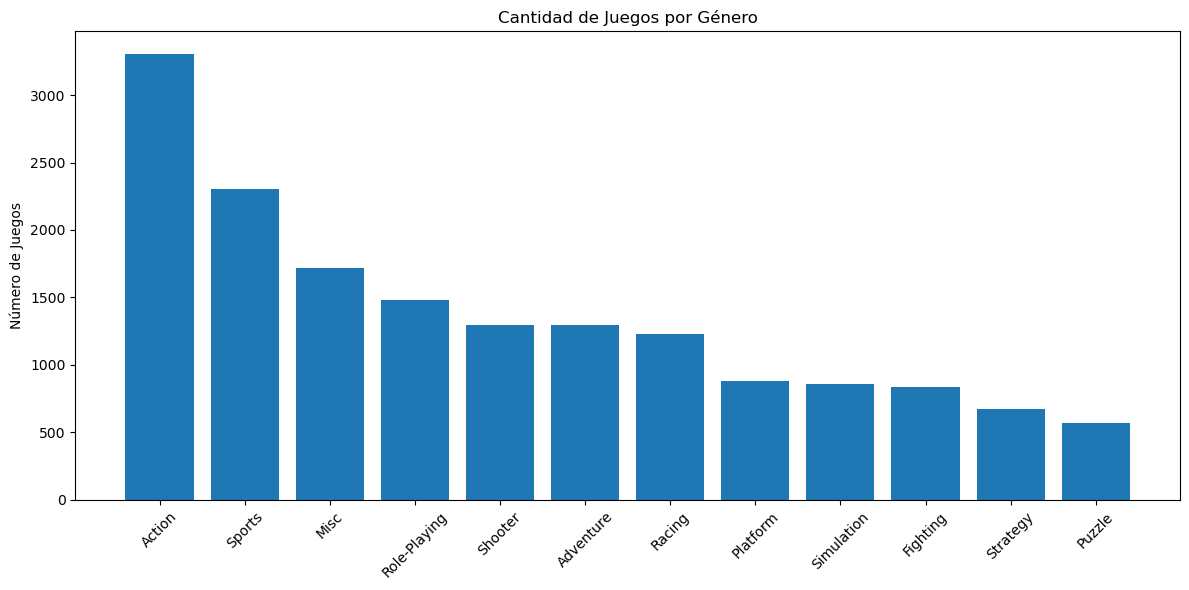

In [45]:
# Análisis de géneros
genre_analysis = df_games.groupby('genre').agg({
    'total_sales': ['count', 'sum', 'mean', 'median'],
    'na_sales': 'sum',
    'eu_sales': 'sum', 
    'jp_sales': 'sum'
}).round(2)

print("ANÁLISIS POR GÉNERO")
print(genre_analysis.sort_values(('total_sales', 'sum'), ascending=False))



plt.figure(figsize=(12, 6))
genre_counts = df_games['genre'].value_counts()
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Cantidad de Juegos por Género')
plt.xticks(rotation=45)
plt.ylabel('Número de Juegos')
plt.tight_layout()
plt.show()

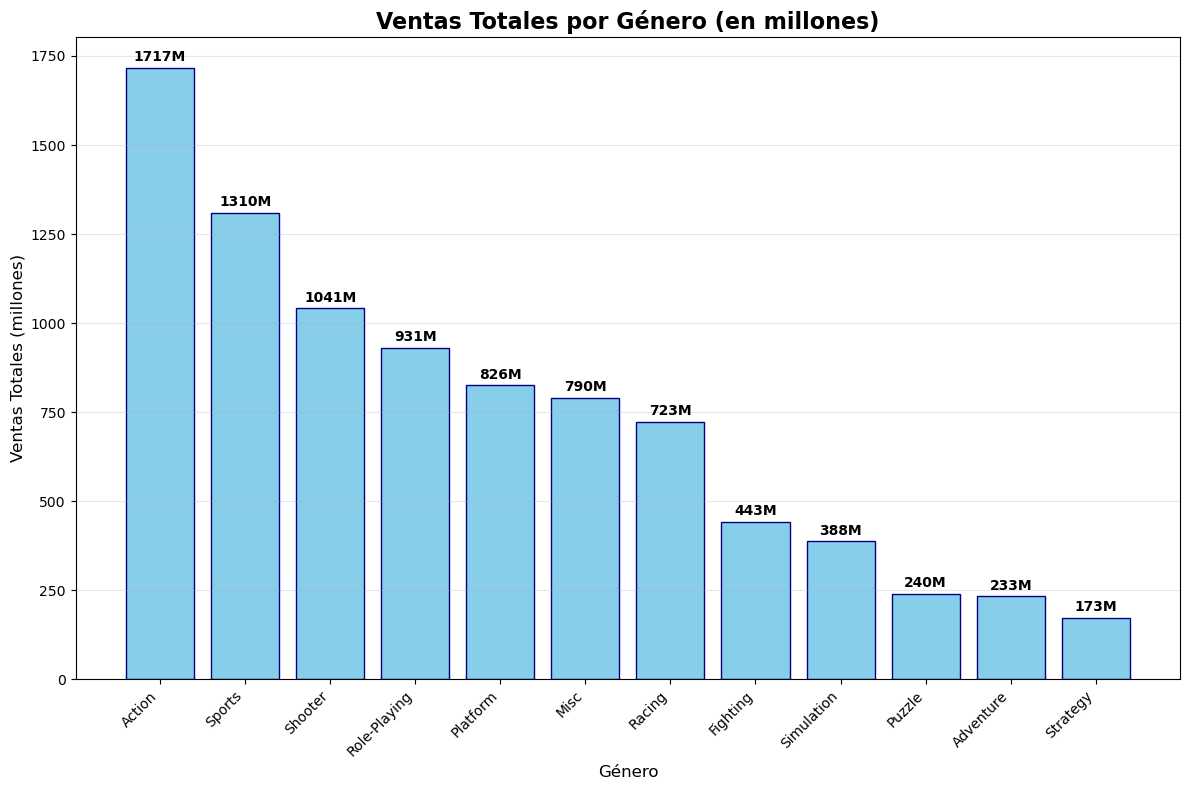

___VENTAS TOTALES POR GÉNERO___
Action: 1716.5 millones
Sports: 1309.7 millones
Shooter: 1041.4 millones
Role-Playing: 931.1 millones
Platform: 825.6 millones
Misc: 790.3 millones
Racing: 723.5 millones
Fighting: 442.7 millones
Simulation: 388.0 millones
Puzzle: 239.9 millones
Adventure: 233.3 millones
Strategy: 172.6 millones


In [46]:
ventas_por_genero = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 8))
bars = plt.bar(ventas_por_genero.index, ventas_por_genero.values, color='skyblue', edgecolor='navy')


plt.title('Ventas Totales por Género (en millones)', fontsize=16, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas Totales (millones)', fontsize=12)
plt.xticks(rotation=45, ha='right')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{height:.0f}M', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()


print("___VENTAS TOTALES POR GÉNERO___")
for genero, ventas in ventas_por_genero.items():
    print(f"{genero}: {ventas:.1f} millones")

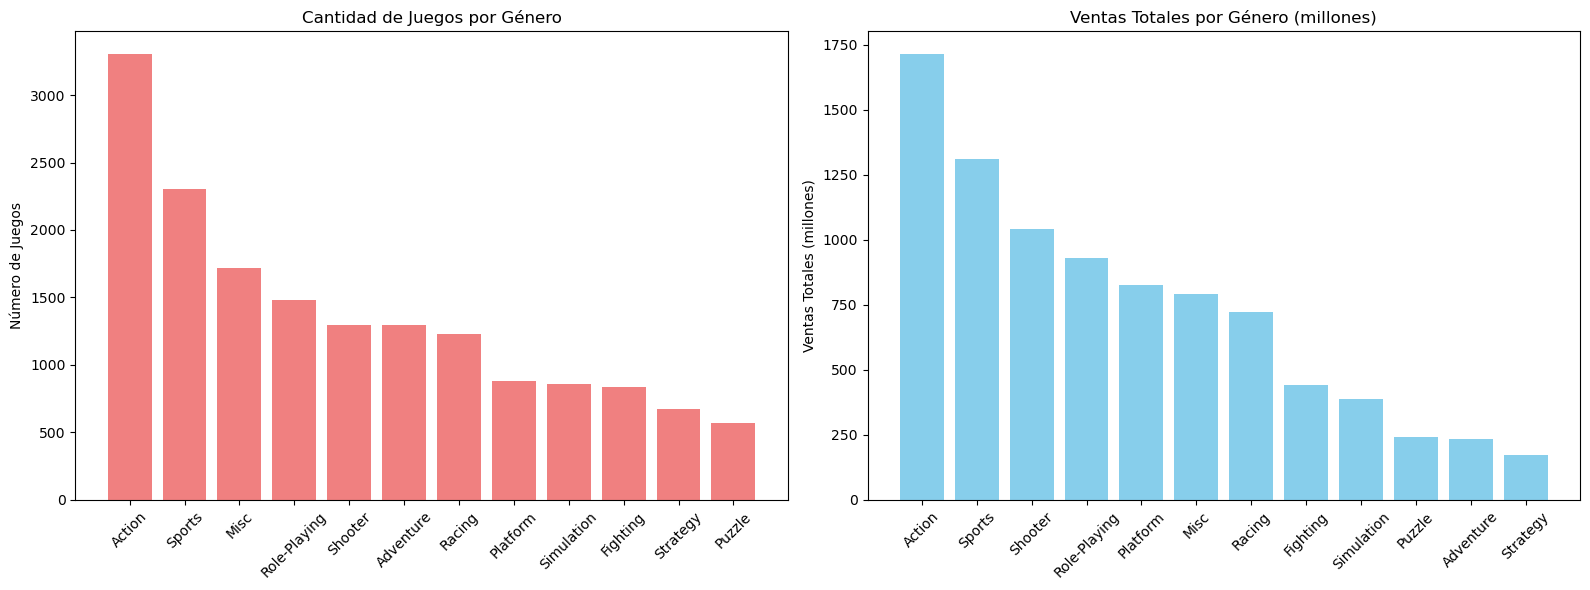

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


cantidad_juegos = df_games['genre'].value_counts()
ax1.bar(cantidad_juegos.index, cantidad_juegos.values, color='lightcoral')
ax1.set_title('Cantidad de Juegos por Género')
ax1.set_ylabel('Número de Juegos')
ax1.tick_params(axis='x', rotation=45)


ax2.bar(ventas_por_genero.index, ventas_por_genero.values, color='skyblue')
ax2.set_title('Ventas Totales por Género (millones)')
ax2.set_ylabel('Ventas Totales (millones)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#Los generos mas rentables son Action y Sports Y una ves mas veo que no por tener mas juegos vas a vendermas.
#sporst y action son los que tienen mas juegos con exito masivo.

In [48]:


# Top plataformas por región
def top_platforms(df, region_col):
    return (
        df.groupby('platform')[region_col].sum()
          .sort_values(ascending=False)
          .head(5)
    )

# Top géneros por región
def top_genres(df, region_col):
    return (
        df.groupby('genre')[region_col].sum()
          .sort_values(ascending=False)
          .head(5)
    )

# Impacto ESRB en ventas
def esrb_impact(df, region_col):
    return (
        df.groupby('rating')[region_col].mean()
          .sort_values(ascending=False)
    )


#PERFILES POR REGIÓN



perfil = {}

for region, col in {
    "North America (NA)": "na_sales",
    "Europe (EU)": "eu_sales",
    "Japan (JP)": "jp_sales"
}.items():
    
    perfil[region] = {
        "Top 5 plataformas": top_platforms(df_games, col),
        "Top 5 géneros": top_genres(df_games, col),
        "Impacto ESRB": esrb_impact(df_games, col)
    }





perfil

{'North America (NA)': {'Top 5 plataformas': platform
  X360    595.74
  PS2     572.92
  Wii     486.87
  PS3     390.13
  DS      380.31
  Name: na_sales, dtype: float64,
  'Top 5 géneros': genre
  Action      863.17
  Sports      671.20
  Shooter     584.83
  Platform    444.44
  Misc        399.57
  Name: na_sales, dtype: float64,
  'Impacto ESRB': rating
  AO      1.260000
  K-A     0.853333
  M       0.483652
  T       0.257349
  E10+    0.248026
  E       0.236047
  EC      0.191250
  RP      0.000000
  Name: na_sales, dtype: float64},
 'Europe (EU)': {'Top 5 plataformas': platform
  PS2     332.63
  PS3     327.21
  X360    268.32
  Wii     258.32
  PS      212.39
  Name: eu_sales, dtype: float64,
  'Top 5 géneros': genre
  Action     510.99
  Sports     371.33
  Shooter    314.52
  Racing     234.49
  Misc       210.60
  Name: eu_sales, dtype: float64,
  'Impacto ESRB': rating
  AO      0.610000
  M       0.312500
  T       0.145194
  E10+    0.131622
  E       0.123979
  K-A 

=== GÉNEROS MENOS POPULARES EN JAPÓN ===
genre
Shooter          38.68
Strategy         49.30
Adventure        52.24
Racing           56.63
Puzzle           56.68
Simulation       63.64
Fighting         87.28
Misc            107.02
Platform        130.71
Sports          134.93
Action          160.14
Role-Playing    353.39
Name: jp_sales, dtype: float64


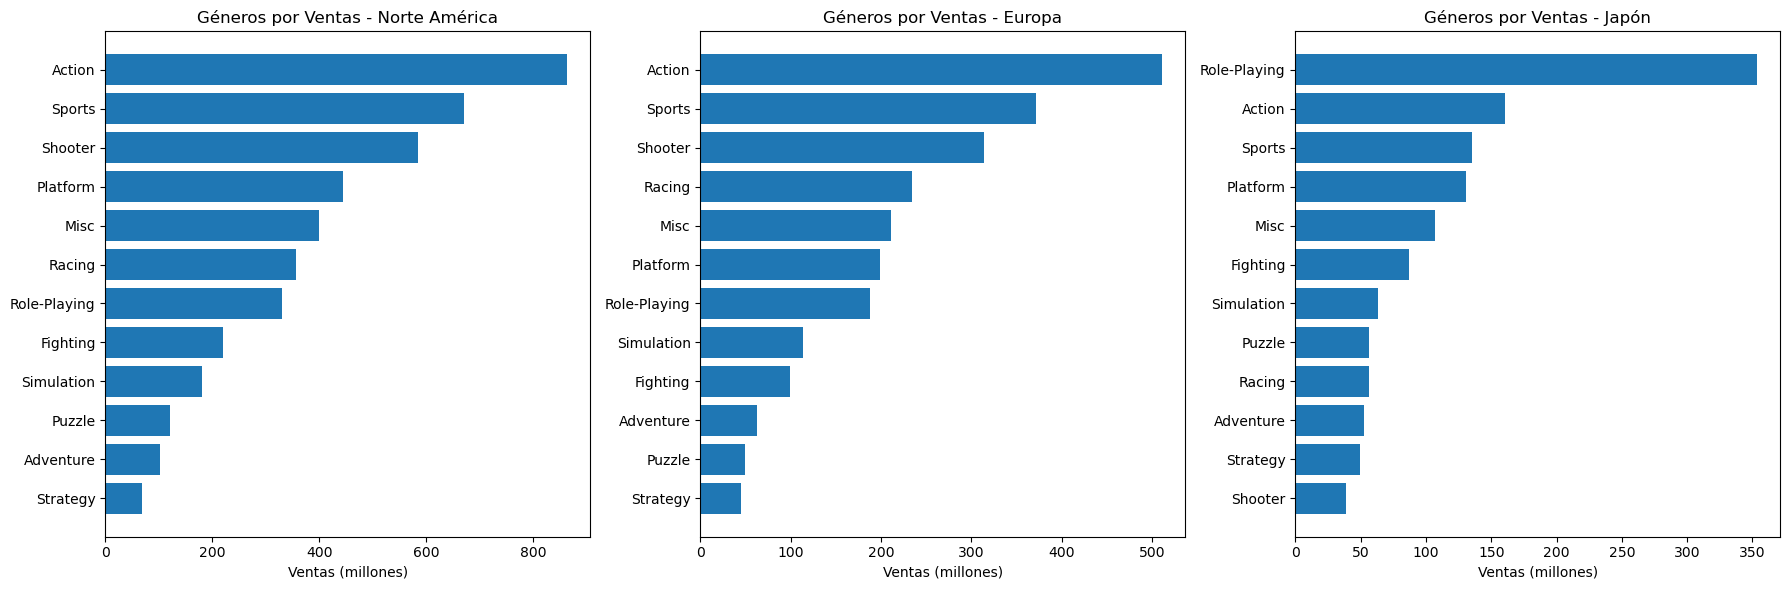

In [49]:
generos_jp_menos_populares = df_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=True)
print("=== GÉNEROS MENOS POPULARES EN JAPÓN ===")
print(generos_jp_menos_populares)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

regiones = [('na_sales', 'Norte América'), ('eu_sales', 'Europa'), ('jp_sales', 'Japón')]

for i, (col, titulo) in enumerate(regiones):
    generos_region = df_games.groupby('genre')[col].sum().sort_values(ascending=True)
    
    axes[i].barh(generos_region.index, generos_region.values)
    axes[i].set_title(f'Géneros por Ventas - {titulo}')
    axes[i].set_xlabel('Ventas (millones)')

plt.tight_layout()
plt.show()

#podemos ver que los generos como los generos principales de occidente son diferentes a japon por la brecha cultural que existe.
#a japon le gusta mas por asi decrilo los juegos sociales en cambio a occidente le guata mas la accion el los shooters.
#las clasificaciones de ESRB si afectan alas regiones, un juego M o A0 no tendria buenas ventas en japon entonces si afecta.

#Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [50]:
xbox_scores = df_games[(df_games['platform'] == 'XOne') & 
                       (df_games['user_score'].notna())]['user_score']

pc_scores = df_games[(df_games['platform'] == 'PC') & 
                     (df_games['user_score'].notna())]['user_score']

print(f"Xbox One - Juegos con calificaciones: {len(xbox_scores)}")
print(f"PC - Juegos con calificaciones: {len(pc_scores)}")

print(f"\nXbox One - Promedio: {xbox_scores.mean():.2f}")
print(f"PC - Promedio: {pc_scores.mean():.2f}")

Xbox One - Juegos con calificaciones: 247
PC - Juegos con calificaciones: 957

Xbox One - Promedio: 6.68
PC - Promedio: 7.08


In [51]:

alpha_001 = 0.01 
alpha_005 = 0.05   
alpha_010 = 0.10 


statistic, p_value_1 = st.ttest_ind(xbox_scores, pc_scores)




print(f"Valor p obtenido: {p_value_1:.4f}")
print(f"\nComparación con diferentes alfas:")
print(f"α = 0.01: {'Rechazar Hipotesis nula' if p_value_1 < alpha_001 else 'No Rechazar Hipotesis nula'}")
print(f"α = 0.05: {'Rechazar Hipotesis nula' if p_value_1 < alpha_005 else 'No Rechazar Hipotesis nula'}")
print(f"α = 0.10: {'Rechazar Hipotesis nula' if p_value_1 < alpha_010 else 'No Rechazar Hipotesis nula'}")

Valor p obtenido: 0.0000

Comparación con diferentes alfas:
α = 0.01: Rechazar Hipotesis nula
α = 0.05: Rechazar Hipotesis nula
α = 0.10: Rechazar Hipotesis nula


#Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [52]:
action_games = df_clean[df_clean['genre'] == 'Action']['user_score']
sports_games = df_clean[df_clean['genre'] == 'Sports']['user_score']

In [53]:
print(f"Juegos de Action: {len(action_games)}")
print(f"Juegos de Sports: {len(sports_games)}")
print(f"\nPromedio Action: {action_games.mean():.3f}")
print(f"Promedio Sports: {sports_games.mean():.3f}")



statistic, p_value_2 = st.ttest_ind(sports_games, action_games)

print(f"Valor p obtenido: {p_value_2:.4f}")
print(f"\nComparación con diferentes alfas:")
print(f"α = 0.01: {'Rechazar Hipotesis nula' if p_value_2 < alpha_001 else 'No rechazar Hipotesis nula'}")
print(f"α = 0.05: {'Rechazar Hipotesis nula' if p_value_2 < alpha_005 else 'No rechazar Hipotesis nula'}")
print(f"α = 0.10: {'Rechazar Hipotesis nula' if p_value_2 < alpha_010 else 'No rechazar Hipotesis nula'}")


Juegos de Action: 1644
Juegos de Sports: 951

Promedio Action: 7.099
Promedio Sports: 7.098
Valor p obtenido: 0.9785

Comparación con diferentes alfas:
α = 0.01: No rechazar Hipotesis nula
α = 0.05: No rechazar Hipotesis nula
α = 0.10: No rechazar Hipotesis nula


#en conclusion que interesante una ves mas lo que se pude saber con este conocimento esto me va ayudar mucho en el futuro con proyectos personales que quiero hacer.
#es interesante como se comparta por ciclos la industria de video juegos y personalmente soy fan de ellos y este ejercicio me ayudo a compernder mas el como analisar datos con un tema que me gusta.
#con los datos y el conociemnto que tengo de los videojeugos fue un ya lo sabia pero con datos reales y por asi decir
